In [1]:
import pandas as pd

In [2]:
dim_campains = pd.read_csv("dim_campaigns.csv")

In [3]:
dim_campains.head()

,campaign_id,campaign_name,start_date,end_date
0,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023
1,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024


In [4]:
dim_campains['campaign_id']

0    CAMP_DIW_01
1    CAMP_SAN_01
Name: campaign_id, dtype: object

In [5]:
dim_products = pd.read_csv("dim_products.csv")

In [6]:
dim_products

,product_code,product_name,category
0,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples
1,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
2,P03,Atliq_Suflower_Oil (1L),Grocery & Staples
3,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
4,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care
5,P06,Atliq_Fusion_Container_Set_of_3,Home Care
6,P09,Atliq_Body_Milk_Nourishing_Lotion (120ML),Personal Care
7,P10,Atliq_Cream_Beauty_Bathing_Soap (125GM),Personal Care
8,P13,Atliq_High_Glo_15W_LED_Bulb,Home Appliances
9,P14,Atliq_waterproof_Immersion_Rod,Home Appliances


In [7]:
dim_stores = pd.read_csv("dim_stores.csv")

In [8]:
dim_stores.head()

,store_id,city
0,STTRV-0,Trivandrum
1,STMDU-3,Madurai
2,STHYD-6,Hyderabad
3,STVSK-1,Visakhapatnam
4,STCBE-3,Coimbatore


In [9]:
fact_events = pd.read_csv("fact_events.csv")

In [10]:
fact_events.head()

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo)
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,85
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93


In [11]:
fact_events['campaign_id']

0       CAMP_SAN_01
1       CAMP_DIW_01
2       CAMP_SAN_01
3       CAMP_DIW_01
4       CAMP_DIW_01
           ...     
1495    CAMP_SAN_01
1496    CAMP_SAN_01
1497    CAMP_DIW_01
1498    CAMP_SAN_01
1499    CAMP_SAN_01
Name: campaign_id, Length: 1500, dtype: object

In [12]:
dim_campains['campaign_id']

0    CAMP_DIW_01
1    CAMP_SAN_01
Name: campaign_id, dtype: object

In [13]:
dim_campains['campaign_id']

0    CAMP_DIW_01
1    CAMP_SAN_01
Name: campaign_id, dtype: object

In [14]:
fact_events['campaign_id']

0       CAMP_SAN_01
1       CAMP_DIW_01
2       CAMP_SAN_01
3       CAMP_DIW_01
4       CAMP_DIW_01
           ...     
1495    CAMP_SAN_01
1496    CAMP_SAN_01
1497    CAMP_DIW_01
1498    CAMP_SAN_01
1499    CAMP_SAN_01
Name: campaign_id, Length: 1500, dtype: object

In [15]:
merged_df = pd.merge(dim_campains, fact_events, on='campaign_id', how='left')

In [16]:
merged_df2 = pd.merge(dim_products, merged_df, on='product_code', how='left')

In [17]:
merged_df3 = pd.merge(dim_stores, merged_df2, on='store_id', how='left')

In [18]:
merged_df3.head()

,store_id,city,product_code,product_name,category,campaign_id,campaign_name,start_date,end_date,event_id,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo)
0,STTRV-0,Trivandrum,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,c4db5b,172,33% OFF,164,236
1,STTRV-0,Trivandrum,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,30c488,172,33% OFF,132,187
2,STTRV-0,Trivandrum,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,0a45d8,860,33% OFF,196,303
3,STTRV-0,Trivandrum,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,72f6b4,860,33% OFF,241,344
4,STTRV-0,Trivandrum,P03,Atliq_Suflower_Oil (1L),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,cc4a67,156,25% OFF,187,181


In [19]:
fact_events.shape

(1500, 8)

In [20]:
merged_df3.shape

(1500, 14)

In [21]:
merged_df3.columns

Index(['store_id', 'city', 'product_code', 'product_name', 'category',
       'campaign_id', 'campaign_name', 'start_date', 'end_date', 'event_id',
       'base_price', 'promo_type', 'quantity_sold(before_promo)',
       'quantity_sold(after_promo)'],
      dtype='object')

In [64]:
merged_df3.dtypes

store_id                        object
city                            object
product_code                    object
product_name                    object
category                        object
campaign_id                     object
campaign_name                   object
start_date                      object
end_date                        object
event_id                        object
base_price                       int64
promo_type                      object
quantity_sold(before_promo)      int64
quantity_sold(after_promo)       int64
base_price_after_dicsount      float64
incremental_revenue            float64
dtype: object

In [22]:
merged_df3['promo_type'].value_counts()

BOGOF           500
25% OFF         400
50% OFF         300
33% OFF         200
500 Cashback    100
Name: promo_type, dtype: int64

In [23]:
merged_df3.groupby('promo_type')['promo_type'].agg('count')

promo_type
25% OFF         400
33% OFF         200
50% OFF         300
500 Cashback    100
BOGOF           500
Name: promo_type, dtype: int64

In [24]:
promo_discounts = {'25% OFF': 0.25,  '33% OFF': 0.33,'50% OFF': 0.5,'500 Cashback ': -500, 'BOGOF': 0.5 }

In [25]:
merged_df3['promo_type_mapped_values'] = merged_df3['promo_type'].map(promo_discounts)


In [26]:
merged_df3['promo_type_mapped_values'].value_counts()

0.50    800
0.25    400
0.33    200
Name: promo_type_mapped_values, dtype: int64

In [27]:
# merged_df3['base_price_after_discount_excluding_500_cashback'] =  (merged_df3['promo_type_mapped_values'])* (merged_df3['base_price'])

In [28]:
merged_df3.head(5)

,store_id,city,product_code,product_name,category,campaign_id,campaign_name,start_date,end_date,event_id,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),promo_type_mapped_values
0,STTRV-0,Trivandrum,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,c4db5b,172,33% OFF,164,236,0.33
1,STTRV-0,Trivandrum,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,30c488,172,33% OFF,132,187,0.33
2,STTRV-0,Trivandrum,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,0a45d8,860,33% OFF,196,303,0.33
3,STTRV-0,Trivandrum,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,72f6b4,860,33% OFF,241,344,0.33
4,STTRV-0,Trivandrum,P03,Atliq_Suflower_Oil (1L),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,cc4a67,156,25% OFF,187,181,0.25


In [29]:
merged_df3.tail(5)

,store_id,city,product_code,product_name,category,campaign_id,campaign_name,start_date,end_date,event_id,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),promo_type_mapped_values
1495,STMYS-1,Mysuru,P07,Atliq_Curtains,Home Care,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,660f7c,300,BOGOF,43,186,0.5
1496,STMYS-1,Mysuru,P08,Atliq_Double_Bedsheet_set,Home Care,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,3d8361,1190,BOGOF,47,184,0.5
1497,STMYS-1,Mysuru,P08,Atliq_Double_Bedsheet_set,Home Care,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,716abd,1190,BOGOF,54,238,0.5
1498,STMYS-1,Mysuru,P15,Atliq_Home_Essential_8_Product_Combo,Combo1,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,d8f51c,3000,500 Cashback,449,1499,NaN
1499,STMYS-1,Mysuru,P15,Atliq_Home_Essential_8_Product_Combo,Combo1,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,eb967c,3000,500 Cashback,133,383,NaN


In [30]:
nan_count = merged_df3['promo_type_mapped_values'].isna().sum()
nan_count

100

In [31]:
base_price = merged_df3.loc[merged_df3['promo_type'] == '500 Cashback', 'base_price']
base_price.value_counts()


3000    100
Name: base_price, dtype: int64

In [32]:
# merged_df3['base_price_after_discount'] = merged_df3['base_price_after_discount_excluding_500_cashback'].fillna(merged_df3['base_price'] - 500, inplace = True)

In [33]:
merged_df3.head(5)

,store_id,city,product_code,product_name,category,campaign_id,campaign_name,start_date,end_date,event_id,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),promo_type_mapped_values
0,STTRV-0,Trivandrum,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,c4db5b,172,33% OFF,164,236,0.33
1,STTRV-0,Trivandrum,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,30c488,172,33% OFF,132,187,0.33
2,STTRV-0,Trivandrum,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,0a45d8,860,33% OFF,196,303,0.33
3,STTRV-0,Trivandrum,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,72f6b4,860,33% OFF,241,344,0.33
4,STTRV-0,Trivandrum,P03,Atliq_Suflower_Oil (1L),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,cc4a67,156,25% OFF,187,181,0.25


In [34]:
merged_df3['x'] = merged_df3['base_price'] - (merged_df3['base_price'] *  merged_df3['promo_type_mapped_values'])

In [35]:
# merged_df3['base_price_after_discount'] = merged_df3['x'].fillna(merged_df3['base_price'] - 500, inplace = True)

In [36]:
merged_df3.head(30)

,store_id,city,product_code,product_name,category,campaign_id,campaign_name,start_date,end_date,event_id,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),promo_type_mapped_values,x
0,STTRV-0,Trivandrum,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,c4db5b,172,33% OFF,164,236,0.33,115.24
1,STTRV-0,Trivandrum,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,30c488,172,33% OFF,132,187,0.33,115.24
2,STTRV-0,Trivandrum,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,0a45d8,860,33% OFF,196,303,0.33,576.20
3,STTRV-0,Trivandrum,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,72f6b4,860,33% OFF,241,344,0.33,576.20
4,STTRV-0,Trivandrum,P03,Atliq_Suflower_Oil (1L),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,cc4a67,156,25% OFF,187,181,0.25,117.00
5,STTRV-0,Trivandrum,P03,Atliq_Suflower_Oil (1L),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,f2d468,200,BOGOF,190,741,0.50,100.00
6,STTRV-0,Trivandrum,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,896c2a,290,25% OFF,180,171,0.25,217.50
7,STTRV-0,Trivandrum,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,9953ec,370,BOGOF,187,733,0.50,185.00
8,STTRV-0,Trivandrum,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,21b73e,55,25% OFF,61,59,0.25,41.25
9,STTRV-0,Trivandrum,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,5e59a1,55,25% OFF,12,11,0.25,41.25


In [37]:

def replace_nan_x(row):
    if pd.isna(row['x']):
        return row['base_price'] - 500
    else:
        return row['x']

merged_df3['x'] = merged_df3.apply(replace_nan_x, axis=1)

print(merged_df3)


     store_id        city product_code                          product_name  \
0     STTRV-0  Trivandrum          P01                Atliq_Masoor_Dal (1KG)   
1     STTRV-0  Trivandrum          P01                Atliq_Masoor_Dal (1KG)   
2     STTRV-0  Trivandrum          P02          Atliq_Sonamasuri_Rice (10KG)   
3     STTRV-0  Trivandrum          P02          Atliq_Sonamasuri_Rice (10KG)   
4     STTRV-0  Trivandrum          P03               Atliq_Suflower_Oil (1L)   
...       ...         ...          ...                                   ...   
1495  STMYS-1      Mysuru          P07                        Atliq_Curtains   
1496  STMYS-1      Mysuru          P08             Atliq_Double_Bedsheet_set   
1497  STMYS-1      Mysuru          P08             Atliq_Double_Bedsheet_set   
1498  STMYS-1      Mysuru          P15  Atliq_Home_Essential_8_Product_Combo   
1499  STMYS-1      Mysuru          P15  Atliq_Home_Essential_8_Product_Combo   

               category  campaign_id ca

In [38]:
merged_df3.tail(30)

,store_id,city,product_code,product_name,category,campaign_id,campaign_name,start_date,end_date,event_id,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),promo_type_mapped_values,x
1470,STMYS-1,Mysuru,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,fbab9b,172,33% OFF,334,591,0.33,115.24
1471,STMYS-1,Mysuru,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,f22294,172,33% OFF,345,520,0.33,115.24
1472,STMYS-1,Mysuru,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,18810a,860,33% OFF,395,711,0.33,576.20
1473,STMYS-1,Mysuru,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,c649ca,860,33% OFF,595,886,0.33,576.20
1474,STMYS-1,Mysuru,P03,Atliq_Suflower_Oil (1L),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,17edbc,156,25% OFF,281,230,0.25,117.00
1475,STMYS-1,Mysuru,P03,Atliq_Suflower_Oil (1L),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,19d7b5,200,BOGOF,382,1596,0.50,100.00
1476,STMYS-1,Mysuru,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,f304a8,290,25% OFF,204,157,0.25,217.50
1477,STMYS-1,Mysuru,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,fe94ae,370,BOGOF,450,1984,0.50,185.00
1478,STMYS-1,Mysuru,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,b91c31,55,25% OFF,89,71,0.25,41.25
1479,STMYS-1,Mysuru,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,7f1521,55,25% OFF,19,14,0.25,41.25


In [39]:
merged_df3.rename(columns = {'x': 'base_price_after_dicsount'}, inplace = True)

In [40]:
merged_df3.columns

Index(['store_id', 'city', 'product_code', 'product_name', 'category',
       'campaign_id', 'campaign_name', 'start_date', 'end_date', 'event_id',
       'base_price', 'promo_type', 'quantity_sold(before_promo)',
       'quantity_sold(after_promo)', 'promo_type_mapped_values',
       'base_price_after_dicsount'],
      dtype='object')

In [41]:
merged_df3['incremental_revenue'] = (merged_df3['base_price_after_dicsount'] * merged_df3['quantity_sold(after_promo)']) - (merged_df3['base_price'] * merged_df3['quantity_sold(before_promo)'])

In [42]:
merged_df3

,store_id,city,product_code,product_name,category,campaign_id,campaign_name,start_date,end_date,event_id,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),promo_type_mapped_values,base_price_after_dicsount,incremental_revenue
0,STTRV-0,Trivandrum,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,c4db5b,172,33% OFF,164,236,0.33,115.24,-1011.36
1,STTRV-0,Trivandrum,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,30c488,172,33% OFF,132,187,0.33,115.24,-1154.12
2,STTRV-0,Trivandrum,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,0a45d8,860,33% OFF,196,303,0.33,576.20,6028.60
3,STTRV-0,Trivandrum,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,72f6b4,860,33% OFF,241,344,0.33,576.20,-9047.20
4,STTRV-0,Trivandrum,P03,Atliq_Suflower_Oil (1L),Grocery & Staples,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,cc4a67,156,25% OFF,187,181,0.25,117.00,-7995.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,STMYS-1,Mysuru,P07,Atliq_Curtains,Home Care,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,660f7c,300,BOGOF,43,186,0.50,150.00,15000.00
1496,STMYS-1,Mysuru,P08,Atliq_Double_Bedsheet_set,Home Care,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,3d8361,1190,BOGOF,47,184,0.50,595.00,53550.00
1497,STMYS-1,Mysuru,P08,Atliq_Double_Bedsheet_set,Home Care,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024,716abd,1190,BOGOF,54,238,0.50,595.00,77350.00
1498,STMYS-1,Mysuru,P15,Atliq_Home_Essential_8_Product_Combo,Combo1,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023,d8f51c,3000,500 Cashback,449,1499,NaN,2500.00,2400500.00


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

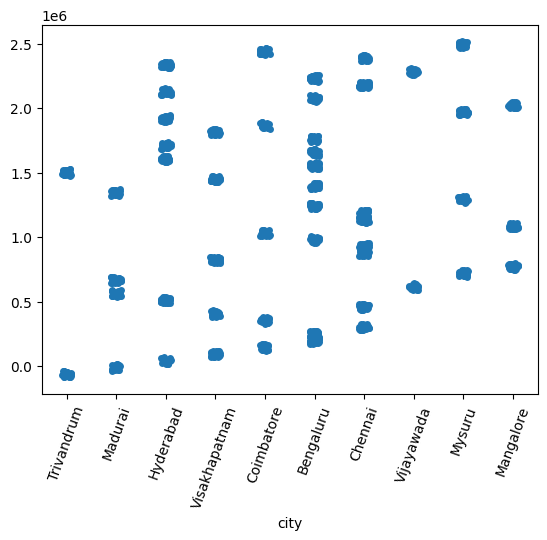

In [44]:
plot = sns.stripplot(x = 'city', y = np.linspace(min(merged_df3['incremental_revenue']),max(merged_df3['incremental_revenue']),len(merged_df3['incremental_revenue'])), data = merged_df3)
plt.setp(plot.get_xticklabels(), rotation = 70)
plt.show()

In [45]:
def format_decimal(x):
    return "{:.2f}".format(x)

In [46]:
d_f = merged_df3['incremental_revenue'].describe()

In [47]:
summary_statistics = d_f.map(format_decimal)

In [48]:
summary_statistics

count       1500.00
mean       71522.23
std       292602.46
min       -85484.00
25%        -2945.00
50%         -620.69
75%        28560.00
max      2518500.00
Name: incremental_revenue, dtype: object

In [49]:
max(merged_df3['incremental_revenue'])

2518500.0

In [50]:
merged_df3.drop(columns = ['promo_type_mapped_values'],inplace = True)

In [51]:
merged_df3.columns

Index(['store_id', 'city', 'product_code', 'product_name', 'category',
       'campaign_id', 'campaign_name', 'start_date', 'end_date', 'event_id',
       'base_price', 'promo_type', 'quantity_sold(before_promo)',
       'quantity_sold(after_promo)', 'base_price_after_dicsount',
       'incremental_revenue'],
      dtype='object')

In [52]:
final_data = merged_df3.to_csv('final_data.csv')

In [53]:
lst = merged_df3.groupby(['category','promo_type']).size().unstack(fill_value=0)

In [54]:
lst_filter = lst.loc[:,(lst!=0).any(axis=0)]

In [55]:
lst_filter.dropna(inplace = True)

In [56]:
lst_filter

promo_type,25% OFF,33% OFF,50% OFF,500 Cashback,BOGOF
category,,,,,
Combo1,0,0,0,100,0
Grocery & Staples,100,200,0,0,100
Home Appliances,0,0,0,0,200
Home Care,200,0,0,0,200
Personal Care,100,0,300,0,0


In [57]:
from scipy.stats import chi2_contingency

In [58]:
chi_sq_result = chi2_contingency(lst_filter)

In [59]:
p, x = chi_sq_result[1], "reject" if chi_sq_result[1] <0.05 else "accept"

In [60]:
print(f"The p-value is {chi_sq_result[1]}")

The p-value is 0.0


In [61]:
Cat_Promo = merged_df3[['category', 'promo_type']].copy()
Cat_Promo.reset_index(drop=True, inplace=True)
print(Cat_Promo)
Promo_type = Cat_Promo.iloc[:,1]
Cat_type = Cat_Promo.iloc[:,0]

               category    promo_type
0     Grocery & Staples       33% OFF
1     Grocery & Staples       33% OFF
2     Grocery & Staples       33% OFF
3     Grocery & Staples       33% OFF
4     Grocery & Staples       25% OFF
...                 ...           ...
1495          Home Care         BOGOF
1496          Home Care         BOGOF
1497          Home Care         BOGOF
1498             Combo1  500 Cashback
1499             Combo1  500 Cashback

[1500 rows x 2 columns]


In [62]:
Cat_type

0       Grocery & Staples
1       Grocery & Staples
2       Grocery & Staples
3       Grocery & Staples
4       Grocery & Staples
              ...        
1495            Home Care
1496            Home Care
1497            Home Care
1498               Combo1
1499               Combo1
Name: category, Length: 1500, dtype: object

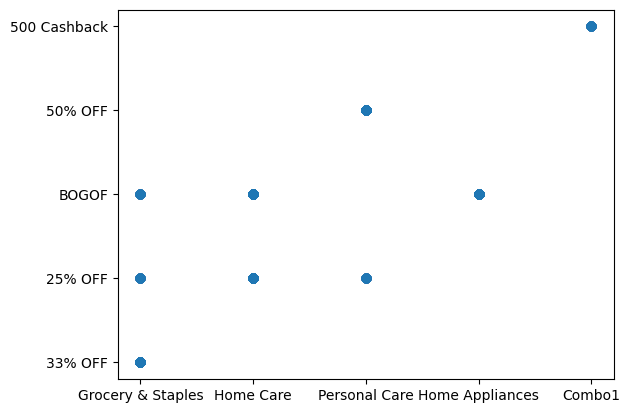

In [63]:
plt.scatter(Cat_type,Promo_type )